## Matplotlib Practice

#### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities

We have 8523 rows and 12 columns in this dataset

Variable - Description

**Item_Identifier**- Unique product ID

**Item_Weight**- Weight of product

**Item_Fat_Content** - Whether the product is low fat or not

**Item_Visibility** - The % of total display area of all products in a store allocated to the particular product

**Item_Type** - The category to which the product belongs

**Item_MRP** - Maximum Retail Price (list price) of the product

**Outlet_Identifier** - Unique store ID

**Outlet_Establishment_Year**- The year in which store was established

**Outlet_Size** - The size of the store in terms of ground area covered

**Outlet_Location_Type**- The type of city in which the store is located

**Outlet_Type**- Whether the outlet is just a grocery store or some sort of supermarket

**Item_Outlet_Sales** - Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read the dataset
data_BM = pd.read_csv('bigmart_data.csv')
print('Shape before remove null',data_BM.shape)
# check for null values
print('\n',data_BM.isnull().sum())
# drop the null values
data_BM = data_BM.dropna(how="any")
# view the top results
print(data_BM.head())
print('\nShape after remove null',data_BM.shape)

Shape before remove null (8523, 12)

 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0         Dairy  249.8092            OUT049               

In [8]:
data_BM['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Household', 'Baking Goods',
       'Snack Foods', 'Fruits and Vegetables', 'Breakfast',
       'Health and Hygiene', 'Frozen Foods', 'Hard Drinks', 'Canned',
       'Starchy Foods', 'Breads', 'Others', 'Seafood'], dtype=object)

###  Line Chart

- We will create a line chart to denote the **mean price per item**. Let's have a look at the code.
- In matplotlib, **line chart** is the default plot when using the `plot()`. 

**groupby()**

Reference - https://www.youtube.com/watch?v=ipoSjrN0oh0

2 ways of writing groupby()
- price_by_item = data_BM.groupby(['Item_Type'])['Item_MRP'].mean()


- price_by_item = data_BM.groupby('Item_Type').Item_MRP.mean()


In [55]:
mean_price = data_BM.groupby(['Item_Type'])['Item_MRP'].mean()

# What column do we want to group by - groupby(['Item_Type'])
# What column we want information returned on - ['Item_MRP']
# What type of information we want returned - e.g. sum / mean etc 

item_price = round(price_by_item,2)
print(item_price, type(item_price))


Item_Type
Baking Goods             125.80
Breads                   141.30
Breakfast                134.09
Canned                   138.55
Dairy                    149.48
Frozen Foods             140.10
Fruits and Vegetables    145.42
Hard Drinks              140.10
Health and Hygiene       131.44
Household                149.88
Meat                     140.28
Others                   137.64
Seafood                  146.60
Snack Foods              147.57
Soft Drinks              130.91
Starchy Foods            151.26
Name: Item_MRP, dtype: float64 <class 'pandas.core.series.Series'>


['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods']


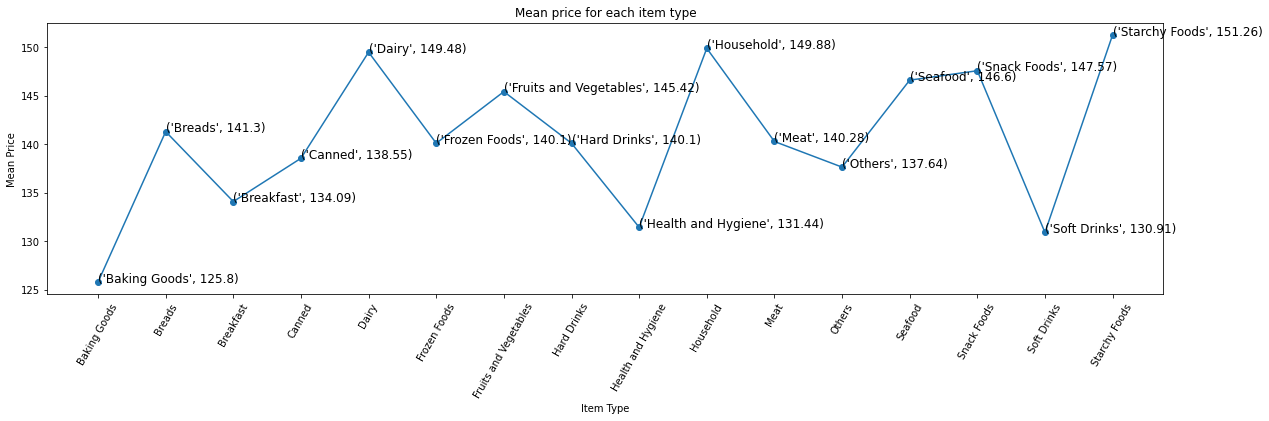

In [66]:
# mean price based on item type
item_price = data_BM.groupby('Item_Type').Item_MRP.mean()
item_price = round(item_price,2)

x = item_price.index.tolist()          # series.index
y = item_price.values.tolist()         # series.values


print(x)
#print(y)

# set figure size
plt.figure(figsize=(20, 5))

# set title
plt.title('Mean price for each item type')

# set axis labels
plt.xlabel('Item Type')
plt.ylabel('Mean Price')

# set xticks 
plt.xticks(ticks=np.arange(len(x)), labels=x)  # plt.xticks(ticks=position, labels=label_name)
plt.tick_params(axis='x',rotation=60) 
plt.plot(x, y, marker='o')

# annotation

for idx in range(len(x)):  #to get total number of elements in x & access values by their index
    plt.text(x[idx], y[idx], (x[idx],y[idx]), size=12) # axes.text(x, y, s) 
   

In [47]:
price_by_item.sort_values(ascending=False)

Item_Type
Starchy Foods            151.256747
Household                149.884244
Dairy                    149.481471
Snack Foods              147.569955
Seafood                  146.595782
Fruits and Vegetables    145.418257
Breads                   141.300639
Meat                     140.279344
Hard Drinks              140.102908
Frozen Foods             140.095830
Canned                   138.551179
Others                   137.640870
Breakfast                134.090683
Health and Hygiene       131.437324
Soft Drinks              130.910182
Baking Goods             125.795653
Name: Item_MRP, dtype: float64

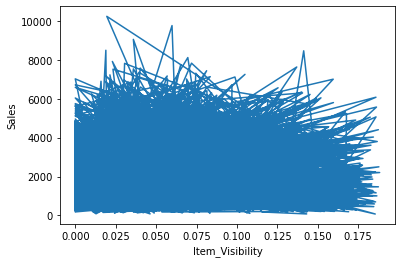

In [49]:
# Example-2 For challenge
plt.plot(data_BM["Item_Visibility"], data_BM["Item_Outlet_Sales"])
plt.xlabel('Item_Visibility')
plt.ylabel('Sales')
plt.show()

###  Bar Chart

- Suppose we want to have a look at **what is the mean sales for each outlet type?** 
- A bar chart is another simple type of visualization that is used for categorical variables.
- You can use `plt.bar()` instead of `plt.plot()` to create a bar chart.


In [60]:
data_BM['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

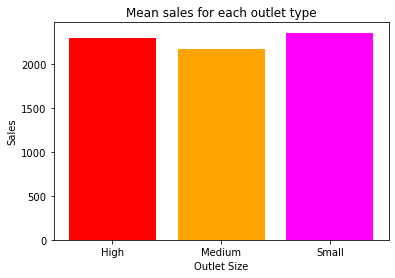

In [67]:
# sales by outlet size
# sales_by_outlet_size = data_BM.groupby('Outlet_Size').Item_Outlet_Sales.mean()

sales_by_outlet = data_BM.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()

# sort by sales
#sales_by_outlet.sort_values(inplace=True)

x = sales_by_outlet.index.tolist()
y = sales_by_outlet.values.tolist()

# set axis labels
plt.xlabel('Outlet Size')
plt.ylabel('Sales')

# set title
plt.title('Mean sales for each outlet type')

# set xticks 
plt.xticks(ticks=np.arange(len(x)),labels=x)

plt.bar(x, y, color=['red', 'orange', 'magenta']);

In [64]:
sales_by_outlet.sort_values(ascending=False)

Outlet_Size
Small     2358.343066
High      2298.995256
Medium    2172.116599
Name: Item_Outlet_Sales, dtype: float64

### Horizontal bar chart 

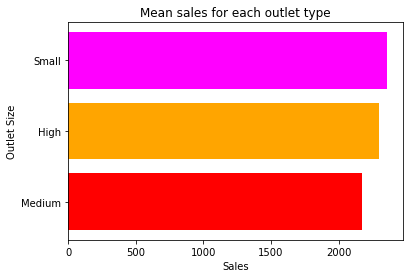

In [70]:
# sales by outlet size
sales_by_outlet_size = data_BM.groupby('Outlet_Size').Item_Outlet_Sales.mean()

# sort by sales
sales_by_outlet_size.sort_values(inplace=True)

x = sales_by_outlet_size.index.tolist()
y = sales_by_outlet_size.values.tolist()

# set axis labels
plt.ylabel('Outlet Size')
plt.xlabel('Sales')

# set title
plt.title('Mean sales for each outlet type')


plt.barh(x, y, color=['red', 'orange', 'magenta']);

### Pie & Exploded Pie charts
### Using Pandas for making pie chart
Pandas is another way to plot (apart from matplotlib implicit and explicit methods)

You can apply plot function directly on your dataframe

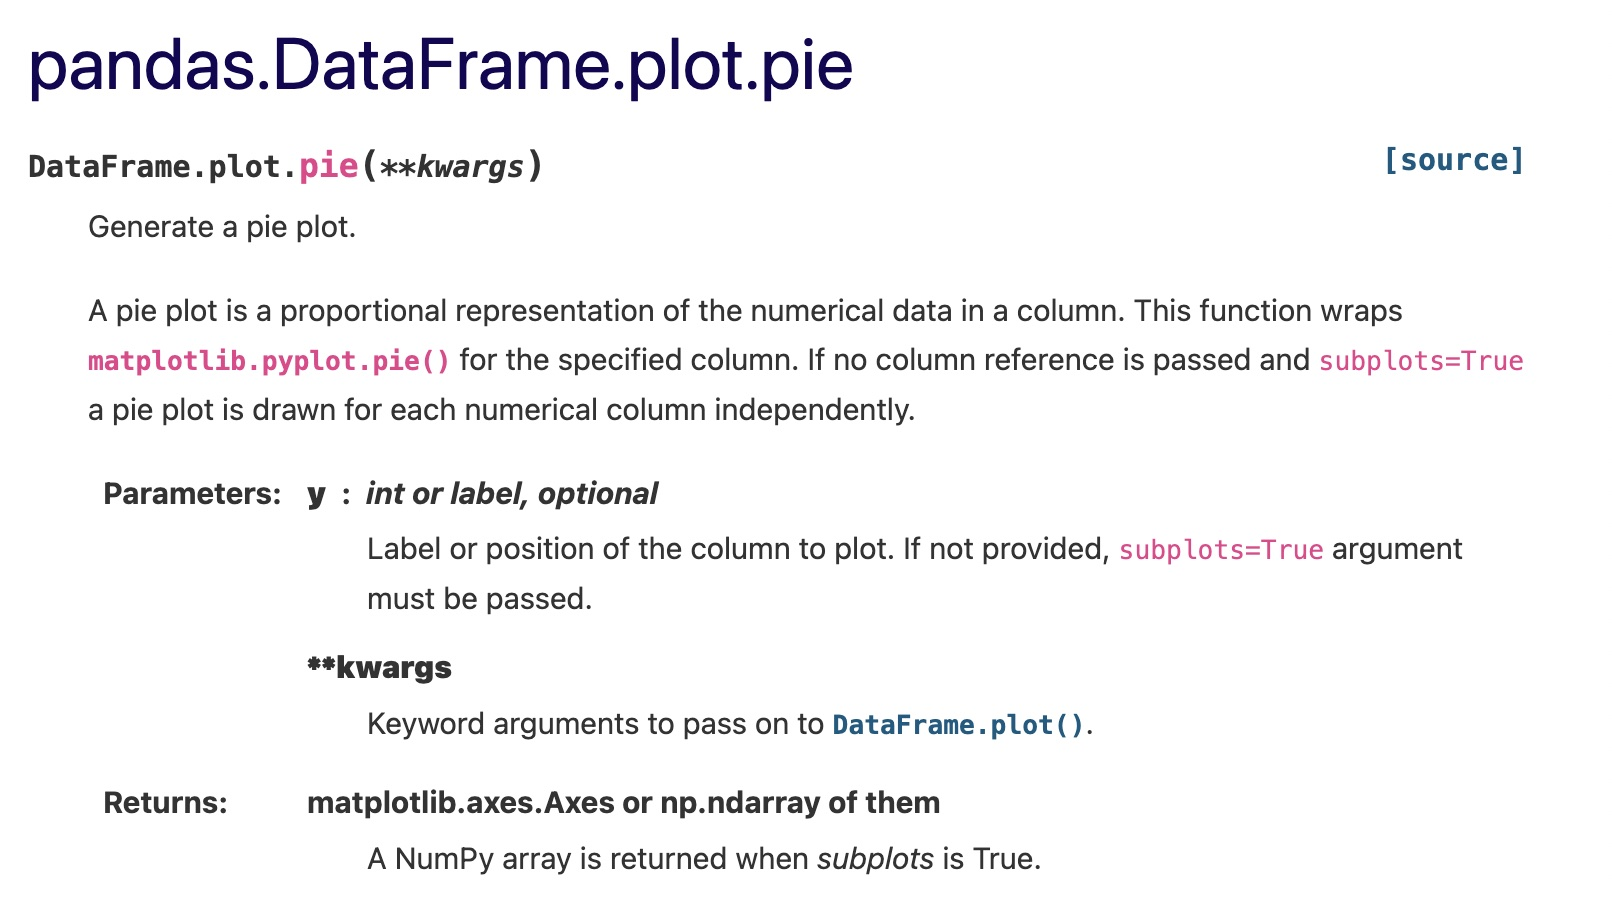


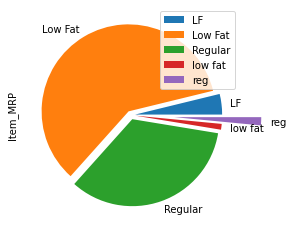

In [118]:
# Plotting the pie chart for Item_Fat_Content against its MRP Prcies
explode = (0.05, 0.05, 0.05,0.05,0.5)
data_BM.groupby(['Item_Fat_Content']).sum().plot(kind='pie', y='Item_MRP',explode=explode);


In [102]:
data_BM.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Using Matplotlib implicit method to plot pie chart

In [87]:
item_fat = data_BM['Item_Fat_Content'].value_counts()
item_fat

Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: Item_Fat_Content, dtype: int64

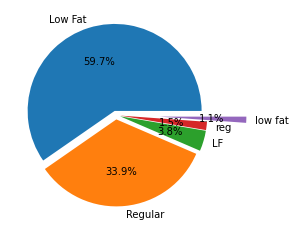

In [115]:
plt.pie(x=item_fat.values, explode=explode, labels=item_fat.index, autopct='%1.1f%%');

### Histogram

- **Distribution of Item price**

- Histogram’s data is plotted within a range against its frequency. 
- Histograms are very commonly occurring graphs in probability and statistics and form the basis for various distributions like the normal -distribution


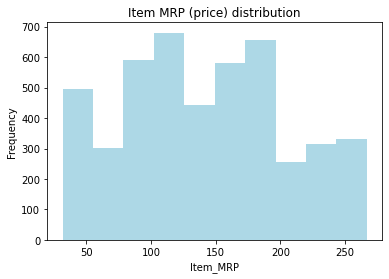

In [119]:
# title
plt.title('Item MRP (price) distribution')

# xlabel
plt.xlabel('Item_MRP')

# ylabel
plt.ylabel('Frequency')

# plot histogram
plt.hist(data_BM['Item_MRP'], bins=10, color='lightblue');

### Box Plots

- **Distribution of sales**
- Box plot shows the three quartile values of the distribution along with extreme values. 
- The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. 
- Let's try to visualize the distributio of Item_Outlet_Sales of items.

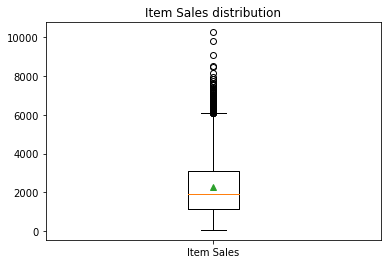

In [122]:
data = data_BM['Item_Outlet_Sales']

# set title
plt.title('Item Sales distribution')

# make the boxplot
plt.boxplot(data, labels=['Item Sales'],showmeans=True);

- You can also create multiple boxplots for different columns of your dataset.
- Let's see Item_Weight, Item_MRP distribution together

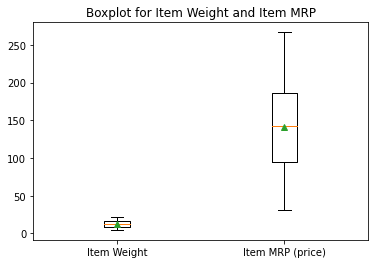

In [144]:
data = data_BM[['Item_Weight', 'Item_MRP']]

# generate subplots
#fig, ax = plt.subplots()

# make the boxplot
plt.boxplot(data, labels=['Item Weight', 'Item MRP (price)'],showmeans=True)
plt.title('Boxplot for Item Weight and Item MRP');

#plt.boxplot(data.values, labels=['Item Weight', 'Item MRP (price)']);

- In order to plot multiple boxplots, you can use the same `subplots()` that we saw earlier.


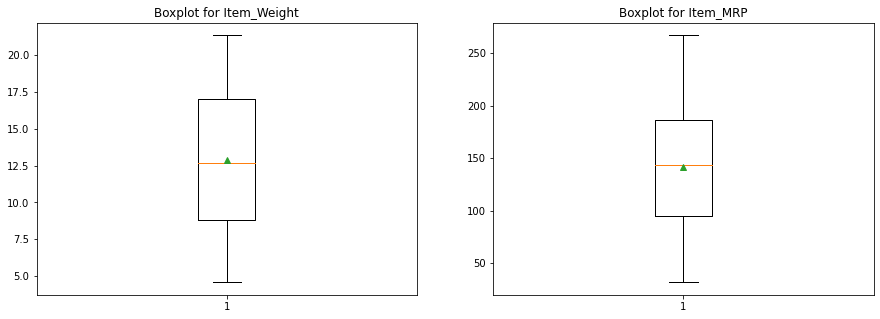

In [142]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].boxplot(data_BM['Item_Weight'],showmeans=True)
ax[0].set_title('Boxplot for Item_Weight')
ax[1].boxplot(data_BM['Item_MRP'],showmeans=True)
ax[1].set_title('Boxplot for Item_MRP');


### Scatter Plots

- **Relative distribution of item weight and it's visibility**
- It depicts the distribution of two variables using a cloud of points, where each point represents an observation in the dataset.
- This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

- Bi variate chart


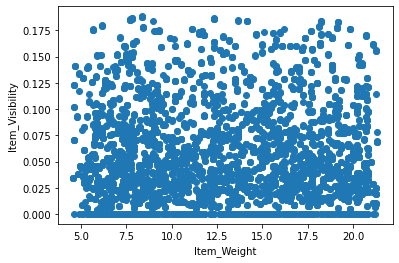

In [146]:
# set label of axes 
plt.xlabel('Item_Weight')
plt.ylabel('Item_Visibility')

# plot
plt.scatter(data_BM["Item_Weight"], data_BM["Item_Visibility"]);